In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline

In [2]:
df_train = pd.read_csv("BBC News Train.csv")
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
df_train.shape

(1490, 3)

In [4]:
df_test = pd.read_csv('BBC News Test.csv')
df_test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [5]:
df_test.shape

(735, 2)

In [6]:
df_final = pd.concat([df_train,df_test], axis = 0, sort= True)

In [7]:
df_final.shape

(2225, 3)

In [8]:
df_final.iloc[1489:].head()

,ArticleId,Category,Text
1489,538,tech,santy worm makes unwelcome visit thousands of ...
0,1018,NaN,qpr keeper day heads for preston queens park r...
1,1319,NaN,software watching while you work software that...
2,1138,NaN,d arcy injury adds to ireland woe gordon d arc...
3,459,NaN,india s reliance family feud heats up the ongo...


In [9]:
df_final.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment', nan],
      dtype=object)

In [10]:
df_final ['Category']= df_final.Category.replace({'business' : 1, 'tech': 2,  'politics':3 , 'sport':4 , 'entertainment': 5})

In [11]:
df_final.head()

,ArticleId,Category,Text
0,1833,1.0,worldcom ex-boss launches defence lawyers defe...
1,154,1.0,german business confidence slides german busin...
2,1101,1.0,bbc poll indicates economic gloom citizens in ...
3,1976,2.0,lifestyle governs mobile choice faster bett...
4,917,1.0,enron bosses in $168m payout eighteen former e...


In [12]:
df_final.sample(5,random_state=0)

,ArticleId,Category,Text
384,674,3.0,msps hear renewed climate warning climate chan...
493,652,NaN,wife swap makers sue us copycat the british ...
985,672,4.0,2004: an irish athletics year 2004 won t be re...
1386,565,4.0,dawson set for new wasps contract european cha...
1294,111,1.0,us trade gap hits record in 2004 the gap betwe...


In [13]:
df_final.groupby('Category').Category.count()

Category
1.0    336
2.0    261
3.0    274
4.0    346
5.0    273
Name: Category, dtype: int64

In [48]:
f = {'business' : 1, 'tech': 2,  'politics':3 , 'sport':4 , 'entertainment': 5}

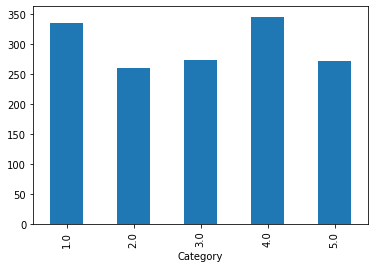

In [15]:
df_final.groupby('Category').Category.count().plot.bar()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfdif= TfidfVectorizer(sublinear_tf = True, min_df = 5, norm = 'l2', encoding = 'latin-1', ngram_range =(1,2), stop_words='english')

In [18]:
features = tfdif.fit_transform(df_train.Text).toarray()

In [59]:
labels = df_train.Category

In [61]:
f = {'business' : 1, 'tech': 2,  'politics':3 , 'sport':4 , 'entertainment': 5}
items = list(f.items())

In [54]:
df_train.Category = df_train.Category.map({'business' : 1, 'tech': 2,  'politics':3 , 'sport':4 , 'entertainment': 5})

In [57]:
df_train.drop(['category_id'], axis = 1, inplace= True)

In [58]:
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,1
1,154,german business confidence slides german busin...,1
2,1101,bbc poll indicates economic gloom citizens in ...,1
3,1976,lifestyle governs mobile choice faster bett...,2
4,917,enron bosses in $168m payout eighteen former e...,1


In [60]:
labels

0       1
1       1
2       1
3       2
4       1
       ..
1485    5
1486    5
1487    1
1488    2
1489    2
Name: Category, Length: 1490, dtype: int64

In [62]:
items

[('business', 1),
 ('tech', 2),
 ('politics', 3),
 ('sport', 4),
 ('entertainment', 5)]

In [112]:
# use chisquare to find the features

from sklearn.feature_selection import chi2

N = 3

for category,category_id in items:
#     print(category)
#     print(category_id)
    
    #calculation of chi2
    features_chi2 = chi2(features, labels == category_id)
    
#     print(features_chi2)
#     print('\n')
    # analyses of all items in this category
    
    indices = np.argsort(features_chi2[0])
#     print(indices)
    feature_names =  np.array(tfdif.get_feature_names())[indices]
    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    
    bigrams = [v for v in feature_names if len(v.split(' '))== 2]
    
    
    print("# '{}' :".format(category))
    
    print(". Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
        
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
    pass

# 'business' :
. Most correlated unigrams:
       . growth
       . bank
       . shares
  . Most correlated bigrams:
       . stock market
       . economic growth
       . analysts said
# 'tech' :
. Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone
# 'politics' :
. Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport' :
. Most correlated unigrams:
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . grand slam
       . champions league
       . australian open
# 'entertainment' :
. Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . won best
       . los angeles
       . box office


In [84]:
'engine'.split(' ') == 1

False

In [96]:
sorted(list(np.array(features_chi2[0]))[indices][-3:])

TypeError: only integer scalar arrays can be converted to a scalar index

In [98]:
np.array(features_chi2[0])[indices]

array([1.69265552e-08, 8.15769926e-08, 1.02335715e-07, ...,
       2.56972235e+01, 2.94487551e+01, 5.36490148e+01])

In [100]:
np.array(tfdif.get_feature_names())[indices]

array(['refer', 'months ago', 'invented', ..., 'singer', 'actor', 'film'],
      dtype='<U26')

In [105]:
len('engine'.split(' ')) == 1

True

In [108]:
'engine'.split(' ')

['engine']

In [113]:
from sklearn.manifold import TSNE

In [118]:
features.shape

(1490, 9927)

In [116]:
np.random.seed(0)

np.random.choice(range(len(features)))

684

In [123]:
sample_size =  int(len(features)*0.3)
sample_size

447

In [125]:
indices = np.random.choice(range(len(features)), size = sample_size, replace = False)

In [128]:
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])

In [129]:
type(projected_features)

numpy.ndarray

In [140]:
my_id = 1

projected_features[(labels[indices] == my_id).values]

array([[ 2.25084610e+01,  2.25375462e+01],
       [ 1.44866810e+01,  1.75584431e+01],
       [ 2.65447636e+01, -2.05667447e-02],
       [ 1.90709743e+01,  1.25699177e+01],
       [ 9.32594967e+00,  1.59450006e+01],
       [ 2.51953354e+01,  1.18212576e+01],
       [ 2.84900875e+01,  1.10059538e+01],
       [ 3.48556595e+01,  1.03721104e+01],
       [ 2.22950878e+01,  1.85004520e+01],
       [ 3.38823433e+01,  4.64539242e+00],
       [ 2.67758465e+01,  9.24796581e+00],
       [ 5.07861471e+00,  2.33345437e+00],
       [ 2.47582130e+01,  1.89290752e+01],
       [ 3.13526459e+01,  7.57639551e+00],
       [ 2.05053139e+01,  1.71243095e+01],
       [ 3.15779934e+01,  1.56370773e+01],
       [ 1.97215614e+01,  6.47910452e+00],
       [ 1.49457235e+01,  2.12091885e+01],
       [ 1.43390522e+01,  1.04054527e+01],
       [ 4.58000374e+00,  1.12586203e+01],
       [ 2.69249153e+01,  1.92828047e+00],
       [ 1.51160107e+01,  5.88965178e+00],
       [ 2.36977997e+01,  1.27149506e+01],
       [ 3.

In [142]:
projected_features.shape

(447, 2)

In [144]:
labels[indices]

1301    3
1215    3
230     3
423     1
1421    5
       ..
1122    2
682     5
1079    4
1432    3
137     1
Name: Category, Length: 447, dtype: int64

In [145]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

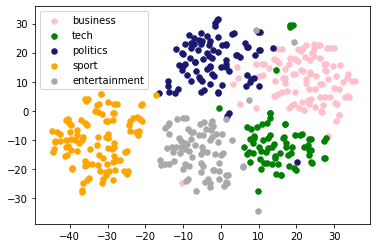

In [149]:
for category, category_id in items:
    points = projected_features[(labels[indices]==category_id).values]
    plt.scatter(points[:,0], points[:,1],s=30, c = colors[category_id-1], label = category)
    plt.legend()

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score

models = [ RandomForestClassifier(n_estimators= 200, max_depth = 3, random_state = 0),
         MultinomialNB(), LogisticRegression(random_state=0)]

In [165]:
cross = 5

cv_df = pd.DataFrame(index = range(cross*len(models)))

entries = []

In [166]:

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features,labels, scoring = 'precision_micro', cv = cross)
    for idx, accuracy in enumerate(accuracies):
        entries.append((model_name, idx, accuracy))

In [156]:
accuracies

array([0.97315436, 0.96308725, 0.98322148, 0.97986577, 0.97651007])

In [176]:
cv_df = pd.DataFrame(entries, columns = ['model_name','fold_idx','accuracy'])

In [173]:
import seaborn as sns

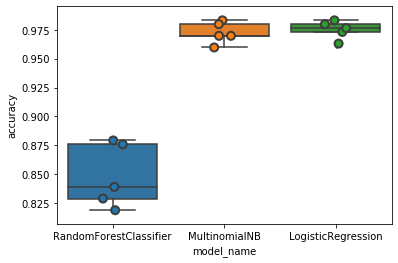

In [179]:

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

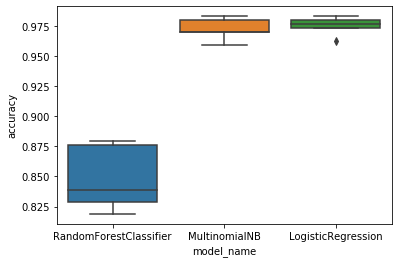

In [178]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)

In [183]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state = 0)

x_train,x_test,y_train,y_test = train_test_split(features, labels,test_size = 0.2, random_state = 0)

In [184]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
y_pred_proba = model.predict_proba(x_test)

y_pred = model.predict(x_test)

In [186]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(y_test, y_pred)

In [195]:
['business','tech','politics','sport','entertainment']

['business', 'tech', 'politics', 'sport', 'entertainment']

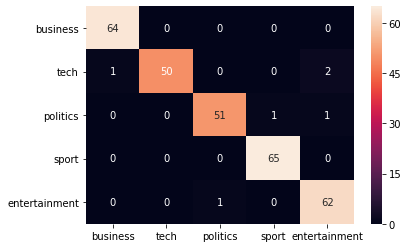

In [197]:
sns.heatmap(conf, annot=True,fmt = 'd',xticklabels= ['business','tech','politics','sport','entertainment'],yticklabels=['business','tech','politics','sport','entertainment'])